In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv('dataset1-cleanname02-03-25.csv')

In [3]:
df1.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Height', 'Dance Type',
       'Dance experience', 'Workout frequency', 'Body type', 'Finding rhythm',
       'Musical Instruments', 'Teamwork', 'Budget', 'Dance Equipment',
       'Flexibility', 'Body Flexibility', 'Closet outfit', 'Partner',
       'Difficulty level', 'Dance Target', 'Dance steps Confusion',
       'Describe yourself', 'Favorite genres', 'Personal Distance', 'Cultures',
       'Favorite Dancing Music'],
      dtype='object')

### Train Model for all features

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Selecting features (X) and target variable (y)
X_train = df1[[ 'Gender', 'Age', 'Height',
       'Dance experience', 'Workout frequency', 'Body type', 'Finding rhythm',
       'Musical Instruments', 'Teamwork', 'Budget', 'Dance Equipment',
       'Flexibility', 'Body Flexibility', 'Closet outfit', 'Partner',
       'Difficulty level', 'Dance Target', 'Dance steps Confusion',
       'Describe yourself', 'Favorite genres', 'Personal Distance', 'Cultures',
       'Favorite Dancing Music']]
y_train = df1['Dance Type']

label_encoders = {}

for col in X_train.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X_train.loc[:, col] = label_encoders[col].fit_transform(X_train[col])

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

C:\Users\negar\AppData\Local\Temp\ipykernel_24108\2235999413.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, col] = label_encoders[col].fit_transform(X_train[col])
C:\Users\negar\AppData\Local\Temp\ipykernel_24108\2235999413.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, col] = label_encoders[col].fit_transform(X_train[col])
C:\Users\negar\AppData\Local\Temp\ipykernel_24108\2235999413.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

RandomForestClassifier(random_state=42)

#### Correlation Matrix

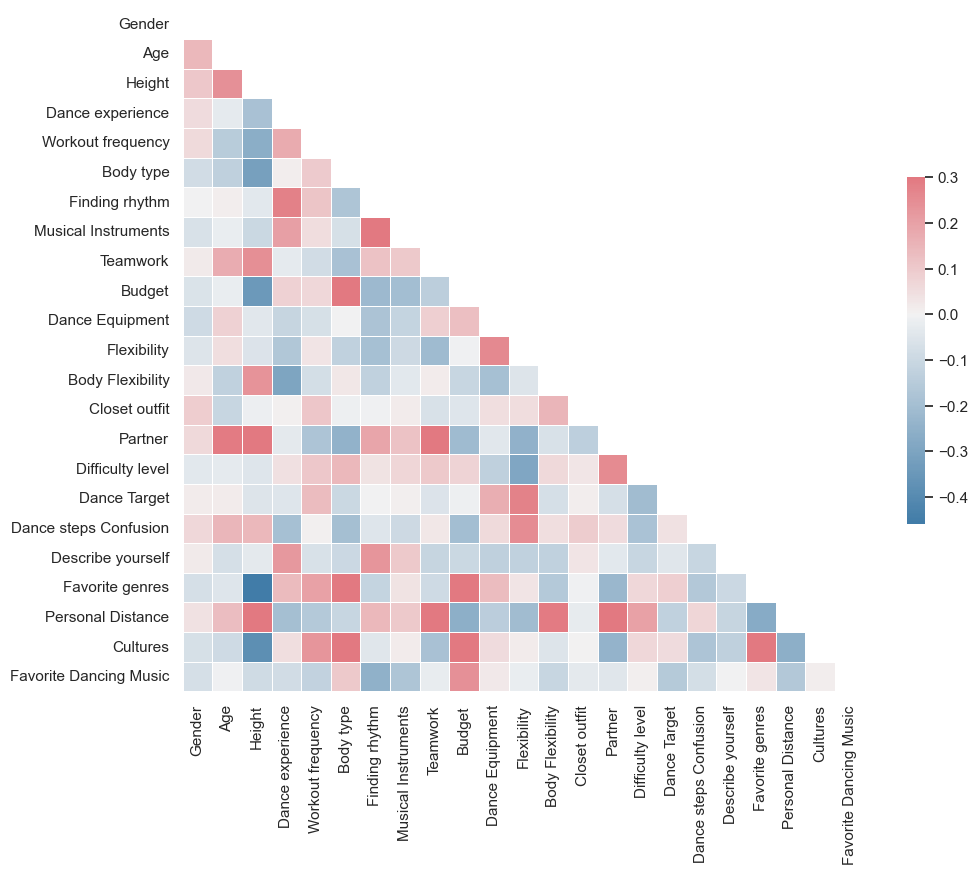

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr()

# Set the theme with a purple color palette
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


#### Feature Importance Analysis

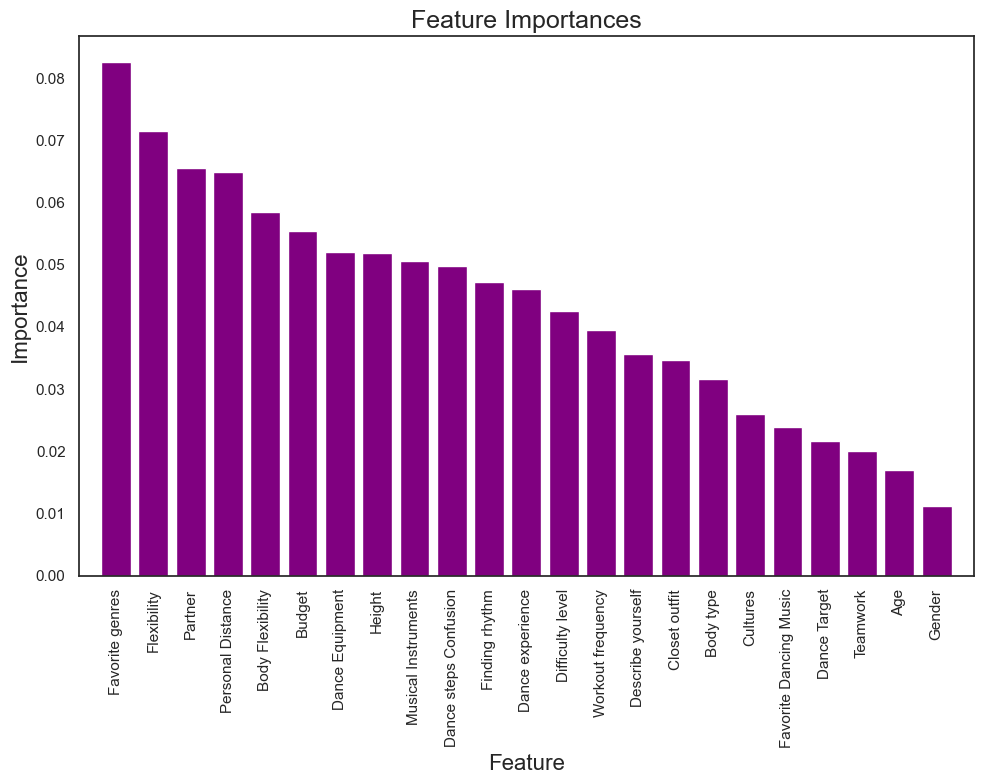

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(importances)[::-1]

# Prepare the labels and their corresponding importances
labels = X_train.columns[sorted_indices]
importances_sorted = importances[sorted_indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.title("Feature Importances", fontsize=18)
plt.bar(range(X_train.shape[1]), importances_sorted, color="purple", align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Feature', fontsize=16)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
# Save the figure as a JPEG file
plt.savefig('feature importance.jpeg', format='jpeg', dpi=300)

plt.show()


###  Decreasing the features & Train Model based on new features

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Selecting features (X) and target variable (y)
X_train = df1[['Height','Dance experience', 'Body type', 
         'Finding rhythm', 'Musical Instruments', 'Closet outfit', 
        'Partner','Dance steps Confusion', 'Flexibility', 'Describe yourself', 
        'Personal Distance','Cultures', 'Favorite genres', 'Dance Target']]
y_train = df1['Dance Type']

# Initialize LabelEncoder
label_encoders = {}

# Label encode categorical features
for col in X_train.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X_train.loc[:, col] = label_encoders[col].fit_transform(X_train[col])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

C:\Users\negar\AppData\Local\Temp\ipykernel_17332\4446703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, col] = label_encoders[col].fit_transform(X_train[col])
C:\Users\negar\AppData\Local\Temp\ipykernel_17332\4446703.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, col] = label_encoders[col].fit_transform(X_train[col])
C:\Users\negar\AppData\Local\Temp\ipykernel_17332\4446703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

RandomForestClassifier(random_state=42)

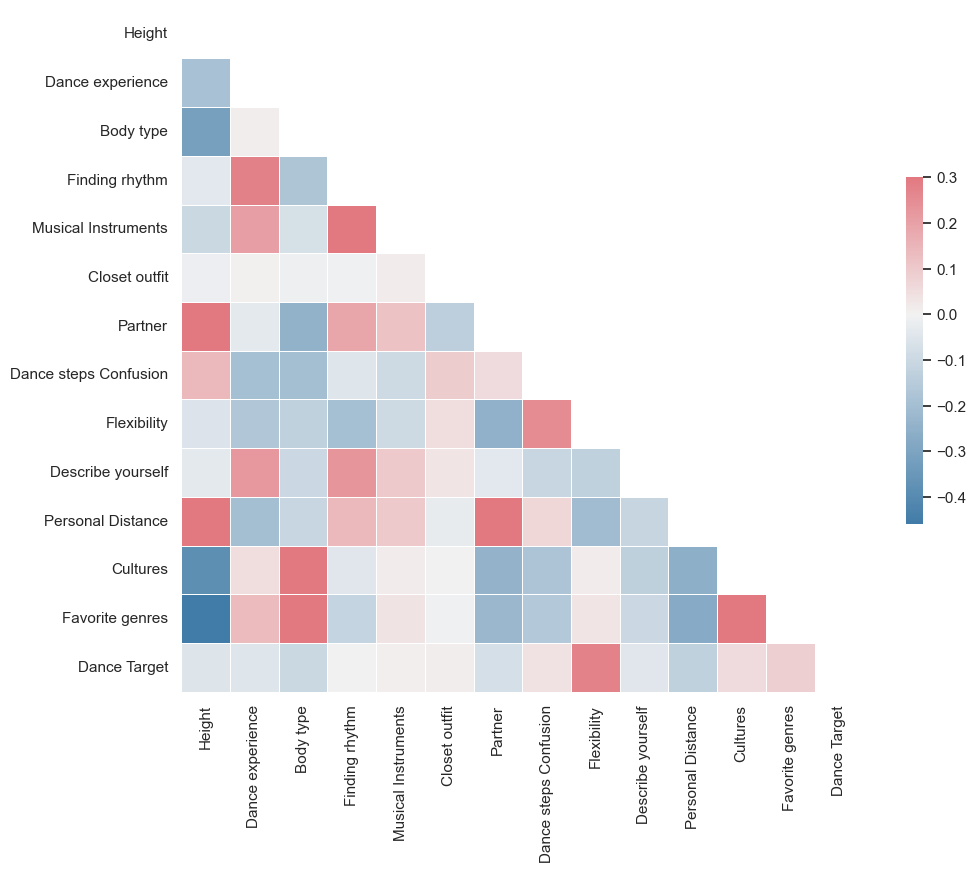

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame after encoding categorical variables

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Set the theme with a purple color palette
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


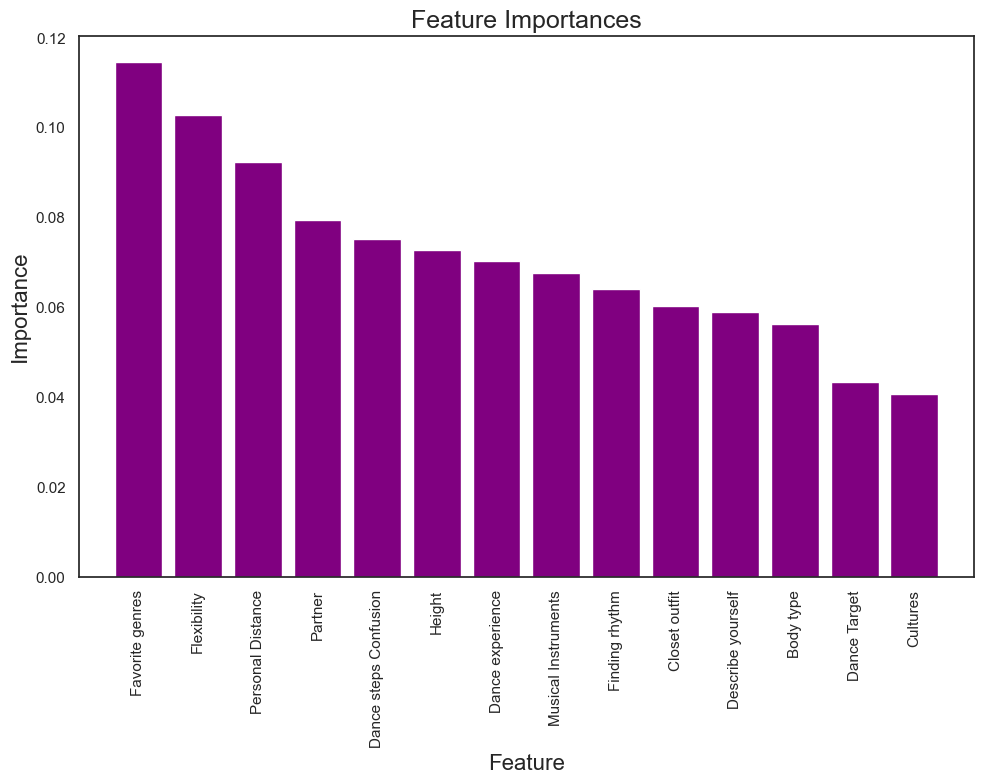

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(importances)[::-1]

# Prepare the labels and their corresponding importances
labels = X_train.columns[sorted_indices]
importances_sorted = importances[sorted_indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.title("Feature Importances", fontsize=18)
plt.bar(range(X_train.shape[1]), importances_sorted, color="purple", align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Feature', fontsize=16)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
# Save the figure as a JPEG file
plt.savefig('feature importance.jpeg', format='jpeg', dpi=300)

plt.show()


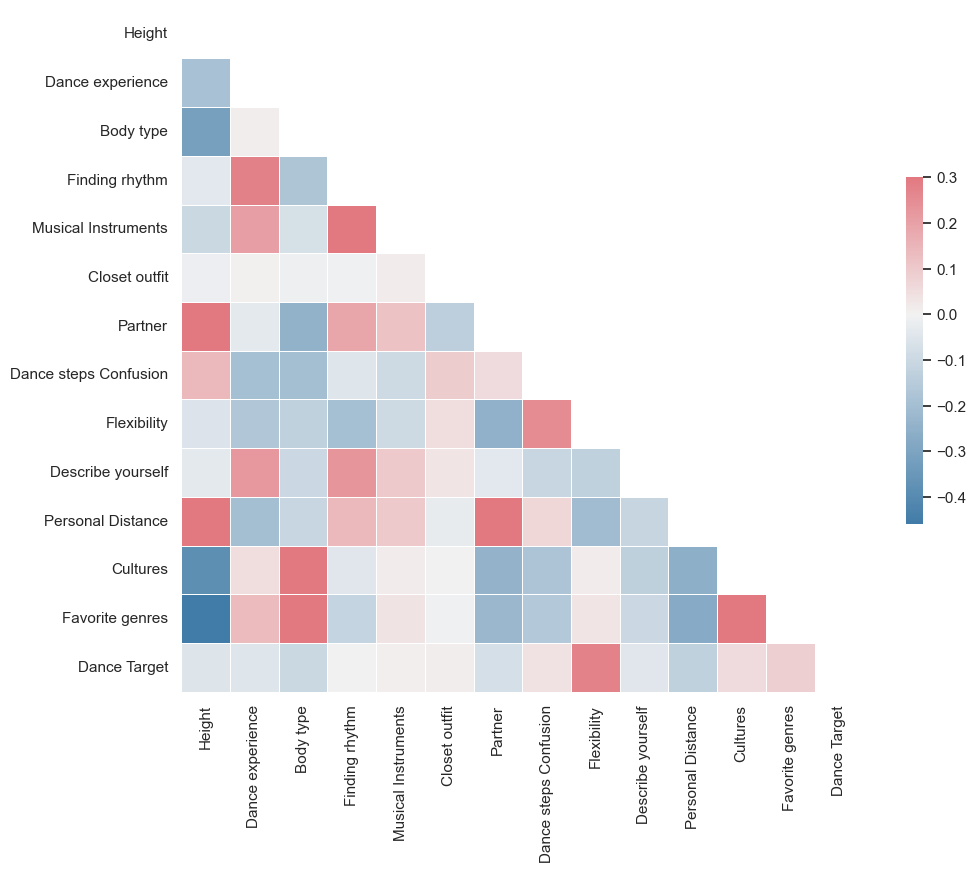

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is your DataFrame after encoding categorical variables

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Set the theme with a purple color palette
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save the figure as a JPEG file
plt.savefig('correlation_matrix.jpeg', format='jpeg', dpi=300)

plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "GBoost": GradientBoostingClassifier(random_state=42),
    "NeuralNetwork": MLPClassifier(random_state=42, max_iter=300)
}

# Dictionary to hold the accuracy of each model
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Convert the accuracy scores to a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display the DataFrame
print(accuracy_df)


           Model  Accuracy
0   RandomForest  0.881720
3         GBoost  0.795699
1            KNN  0.752688
4  NeuralNetwork  0.741935
2   DecisionTree  0.688172


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Prediction

In [6]:
# Assuming you have the information about the person in a dictionary format


person_info = {
    'Height': '161-175cm',
    'Dance experience': '1 to 3 years of experience',
    'Body type': 'Naturally curvier or softer physique',
    'Finding rhythm': 'Most of the times I memorize the rhythm by practicing',
    'Musical Instruments': 'String instruments',
    'Closet outfit': 'Casual dress (T-shirt and pants)',
    'Partner': 'Yes',
    'Dance steps Confusion': 'Sometimes, but after 2-3 times it will be fine',
    'Flexibility': 'I almost have my splits and have a nice flexible back',
    'Describe yourself': 'Adventurous',
    'Personal Distance': 'Moderately Comfortable',
    'Cultures': 'Yes so much',
    'Favorite genres': 'Latino music',
    'Dance Target': 'Intermediate goal: Improving skills and dancing for self joy and self discovery', 
    
}

# Convert person_info into DataFrame
person_df = pd.DataFrame([person_info])

# Encode categorical features using label encoders
for col in person_df.select_dtypes(include=['object']).columns:
    person_df.loc[:, col] = label_encoders[col].transform(person_df[col])

# Make predictions
predicted_dance_type = rf_model.predict(person_df)

# Print the predicted dance type
print("Predicted Dance Type for the Person:")
print(predicted_dance_type[0])


Predicted Dance Type for the Person:
Salsa/Bachata


C:\Users\negar\AppData\Local\Temp\ipykernel_11016\720584826.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  person_df.loc[:, col] = label_encoders[col].transform(person_df[col])
C:\Users\negar\AppData\Local\Temp\ipykernel_11016\720584826.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  person_df.loc[:, col] = label_encoders[col].transform(person_df[col])
C:\Users\negar\AppData\Local\Temp\ipykernel_11016\720584826.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead